In [2]:
import numpy as np 
import pandas as pd 

**Viewing the English Premier League matches data**

In [3]:
data=pd.read_csv('/kaggle/input/premier-league-matches-19922022/eplmatches.csv')
data.head(5)                    

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [4]:
data['winner'] = data.apply(lambda row: row['Home'] if row['FTR'] == 'H' else row['Away'] if row['FTR'] == 'A' else 'Draw', axis=1)
data.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,winner
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,Coventry City
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,Leeds United
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,Draw
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,Norwich City


In [5]:
import matplotlib.pyplot as plt

**Computing total wins for each team including**

In [43]:
team_wins = data[['winner','Home']].groupby('winner').count()
team_wins=team_wins.rename(columns={'Home':'Wins'})
team_wins.head()

,Wins
winner,
Arsenal,619
Aston Villa,354
Barnsley,10
Birmingham City,73
Blackburn,262


In [52]:
team_wins.drop(labels='Draw',axis=0,inplace=True)
team_wins = team_wins.sort_values(by='Wins', ascending=False)
team_wins.head(6)

,Wins
winner,
Manchester Utd,703
Arsenal,619
Chelsea,618
Liverpool,609
Tottenham,502
Manchester City,473


**Viewing total wins distribution across all teams**

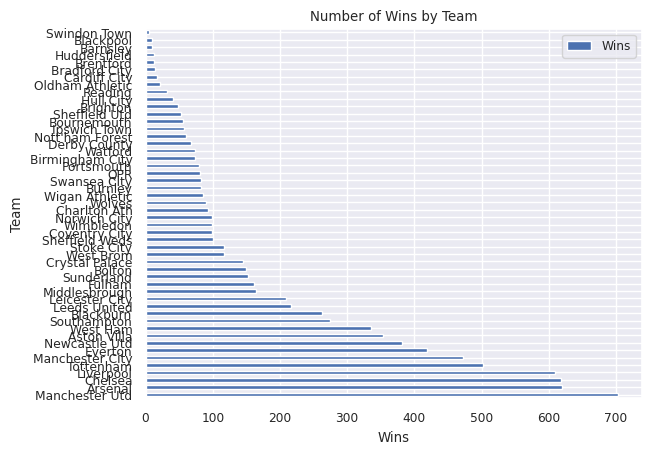

In [64]:
team_wins.plot.barh()
plt.gca().set(title='Number of Wins by Team', xlabel='Wins', ylabel='Team')
plt.show()

Add visual to compare impact of covid on home games

In [65]:

results = data.groupby(['FTR','Season_End_Year']).count()
results

Wk  Date  Home  HomeGoals  AwayGoals  Away  winner  \
FTR Season_End_Year                                                        
A   1993             118   118   118        118        118   118     118   
    1994             128   128   128        128        128   128     128   
    1995             123   123   123        123        123   123     123   
    1996              96    96    96         96         96    96      96   
    1997              99    99    99         99         99    99      99   
...                  ...   ...   ...        ...        ...   ...     ...   
H   2018             173   173   173        173        173   173     173   
    2019             181   181   181        181        181   181     181   
    2020             172   172   172        172        172   172     172   
    2021             144   144   144        144        144   144     144   
    2022             163   163   163        163        163   163     163   

                     loser  Winning Team  Home Points  Away Points  
FTR Season_End_Year                                                 
A   1993               118           118          118          118  
    1994               128           128          128          128  
    1995               123           123          123          123  
    1996                96            96           96           96  
    1997                99            99           99           99  
...                    ...           ...          ...          ...  
H   2018               173           173          173          173  
    2019               181           181          181          181  
    2020               172           172          172          172  
    2021               144           144          144          144  
    2022               163           163          163          163  

[90 rows x 11 columns]

In [67]:
results=results[['winner']]
results.head()

winner
FTR Season_End_Year        
A   1993                118
    1994                128
    1995                123
    1996                 96
    1997                 99

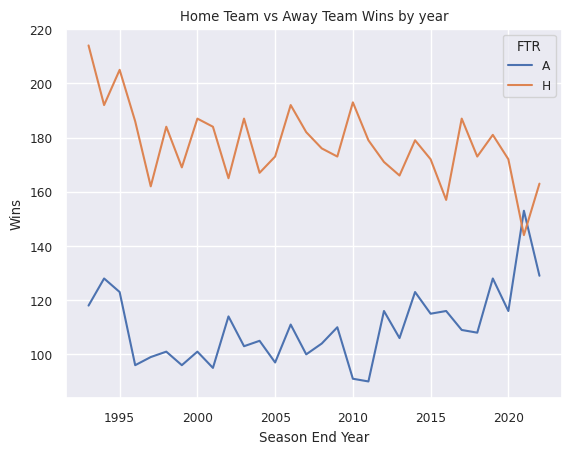

In [58]:
# Reset the index of the DataFrame
results = results.reset_index()

# Filter the DataFrame to select decisive results (no draws)
results_subset = results.query("FTR in ['A', 'H']")[['Season_End_Year', 'winner', 'FTR']]

# Pivot the DataFrame to have categories as columns
results_pivot = results_subset.pivot(columns='FTR', values='winner', index='Season_End_Year')

# Plotting the results as a line chart
results_pivot.plot(kind='line')
plt.title('Home Team vs Away Team Wins by year')
plt.xlabel('Season End Year')
plt.ylabel('Wins')
plt.show()

**Home teams have a clear advantage in the premier league. A Notable outlier is the 19/20 season where Covid-19 mandated games played with no crowds**

In [59]:
goals_scored = data.groupby(['Season_End_Year']).sum()
goals_scored =goals_scored[['HomeGoals','AwayGoals']]
goals_scored

,HomeGoals,AwayGoals
Season_End_Year,,
1993,723,499
1994,663,532
1995,697,498
1996,580,408
1997,559,411
1998,592,427
1999,553,406
2000,635,425
2001,587,405


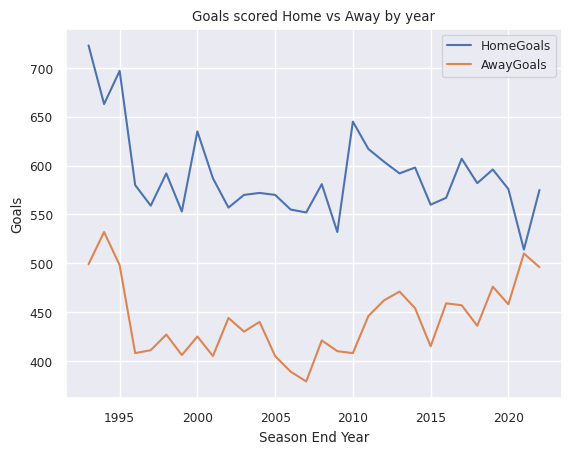

In [60]:
goals_scored.plot(kind='line')

# Add chart titles and labels
plt.title('Goals scored Home vs Away by year')
plt.xlabel('Season End Year')
plt.ylabel('Goals')
plt.show()

In [19]:
data['loser'] = data.apply(lambda row: row['Home'] if row['FTR'] == 'A' else row['Away'] if row['FTR'] == 'H' else 'Draw', axis=1)
data.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,winner,loser
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,Coventry City,Middlesbrough
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,Leeds United,Wimbledon
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd,Manchester Utd
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,Draw,Draw
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,Norwich City,Arsenal


In [20]:
data.head(15)

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,winner,loser
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,Coventry City,Middlesbrough
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,Leeds United,Wimbledon
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd,Manchester Utd
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,Draw,Draw
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,Norwich City,Arsenal
5,1993,1,1992-08-15,Ipswich Town,1,1,Aston Villa,D,Draw,Draw
6,1993,1,1992-08-15,Everton,1,1,Sheffield Weds,D,Draw,Draw
7,1993,1,1992-08-15,Southampton,0,0,Tottenham,D,Draw,Draw
8,1993,1,1992-08-15,Chelsea,1,1,Oldham Athletic,D,Draw,Draw
9,1993,1,1992-08-16,Nott'ham Forest,1,0,Liverpool,H,Nott'ham Forest,Liverpool


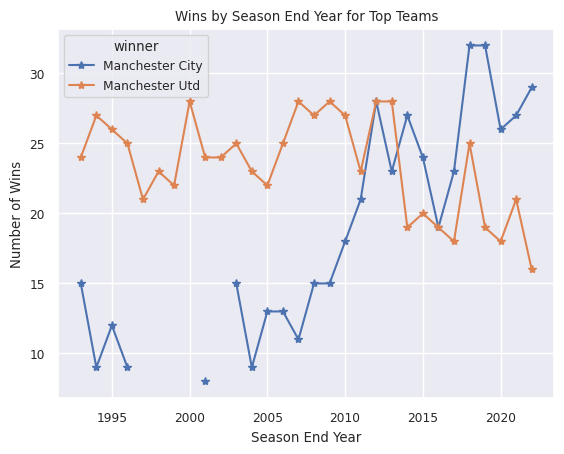

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Looking specifically at the Manchester Derby Rivals
teams = ['Manchester Utd', 'Manchester City']

# Filtering the matches to only include those where the winner is one of the teams
team_matches = data[data['winner'].isin(teams)]

# Group the matches by season end year and the winning team, and count the number of wins for each team in each year
win_counts = team_matches.groupby(['Season_End_Year', 'winner'])['winner'].count()

# Pivot the table so that each team has its own column
win_table = win_counts.unstack('winner')

# Plot the resulting DataFrame
win_table.plot(kind='line', marker='*')

# Set the axis labels and title
plt.xlabel('Season End Year')
plt.ylabel('Number of Wins')
plt.title('Wins by Season End Year for Top Teams')

# Show the plot
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column 'Winning Team' to store the name of the winning team for each match
data['Winning Team'] = data.apply(lambda row: row['Home'] if row['FTR'] == 'H' else row['Away'] if row['FTR'] =='A' else 'Draw', axis=1)

# Calculate the number of points for each team for each match
data['Home Points'] = data.apply(lambda row: 3 if row['FTR'] == 'H' else 1 if row['FTR'] == 'D' else 0, axis=1)
data['Away Points'] = data.apply(lambda row: 3 if row['FTR'] == 'A' else 1 if row['FTR'] == 'D' else 0, axis=1)
data.head(10)

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,winner,loser,Winning Team,Home Points,Away Points
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,Coventry City,Middlesbrough,Coventry City,3,0
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,Leeds United,Wimbledon,Leeds United,3,0
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd,Manchester Utd,Sheffield Utd,3,0
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,Draw,Draw,Draw,1,1
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,Norwich City,Arsenal,Norwich City,0,3
5,1993,1,1992-08-15,Ipswich Town,1,1,Aston Villa,D,Draw,Draw,Draw,1,1
6,1993,1,1992-08-15,Everton,1,1,Sheffield Weds,D,Draw,Draw,Draw,1,1
7,1993,1,1992-08-15,Southampton,0,0,Tottenham,D,Draw,Draw,Draw,1,1
8,1993,1,1992-08-15,Chelsea,1,1,Oldham Athletic,D,Draw,Draw,Draw,1,1
9,1993,1,1992-08-16,Nott'ham Forest,1,0,Liverpool,H,Nott'ham Forest,Liverpool,Nott'ham Forest,3,0


**Computing points required to win for each year**

In [28]:

# Calculate the number of wins, losses, and draws for each team by season
wins = data.groupby(['Season_End_Year', 'winner'])['winner'].count().reset_index(name='Wins')
losses = data.groupby(['Season_End_Year', 'loser'])['loser'].count().reset_index(name='Losses')
#draws = data[data['FTR'] == 'D'].groupby(['Season_End_Year'])[['FTR']].count().reset_index().rename(columns={'FTR': 'Draws'})
#teams = pd.concat([wins, losses], axis=0, ignore_index=True).groupby(['Season_End_Year', 'winner']).sum().reset_index()

losses.tail(20)

,Season_End_Year,loser,Losses
615,2022,Aston Villa,19
616,2022,Brentford,18
617,2022,Brighton,11
618,2022,Burnley,17
619,2022,Chelsea,6
620,2022,Crystal Palace,12
621,2022,Draw,88
622,2022,Everton,21
623,2022,Leeds United,18
624,2022,Leicester City,14


In [29]:
wins = wins.rename(columns={'winner': 'Team'})
losses = losses.rename(columns={'loser': 'Team'})

losses.tail(20)

,Season_End_Year,Team,Losses
615,2022,Aston Villa,19
616,2022,Brentford,18
617,2022,Brighton,11
618,2022,Burnley,17
619,2022,Chelsea,6
620,2022,Crystal Palace,12
621,2022,Draw,88
622,2022,Everton,21
623,2022,Leeds United,18
624,2022,Leicester City,14


In [30]:
#team_season_stats = pd.concat([wins, losses['Losses']], axis=1)
team_season_stats = pd.merge(wins, losses, on=['Season_End_Year', 'Team'], how='outer')

#team_season_stats['Draws']=38-team_season_stats['Wins']-team_season_stats['Losses']
#team_season_stats['Points']=3*team_season_stats['Wins']+team_season_stats['Draws']
team_season_stats.tail(20)

,Season_End_Year,Team,Wins,Losses
616,2022,Aston Villa,13,19.0
617,2022,Brentford,13,18.0
618,2022,Brighton,12,11.0
619,2022,Burnley,7,17.0
620,2022,Chelsea,21,6.0
621,2022,Crystal Palace,11,12.0
622,2022,Draw,88,88.0
623,2022,Everton,11,21.0
624,2022,Leeds United,9,18.0
625,2022,Leicester City,14,14.0


In [31]:
team_season_stats['Draws']=38-team_season_stats['Wins']-team_season_stats['Losses']
team_season_stats['Points']=3*team_season_stats['Wins']+team_season_stats['Draws']
team_season_stats = team_season_stats[team_season_stats['Team'] != 'Draw']
team_season_stats.tail(20)


,Season_End_Year,Team,Wins,Losses,Draws,Points
615,2022,Arsenal,22,13.0,3.0,69.0
616,2022,Aston Villa,13,19.0,6.0,45.0
617,2022,Brentford,13,18.0,7.0,46.0
618,2022,Brighton,12,11.0,15.0,51.0
619,2022,Burnley,7,17.0,14.0,35.0
620,2022,Chelsea,21,6.0,11.0,74.0
621,2022,Crystal Palace,11,12.0,15.0,48.0
623,2022,Everton,11,21.0,6.0,39.0
624,2022,Leeds United,9,18.0,11.0,38.0
625,2022,Leicester City,14,14.0,10.0,52.0


In [32]:
max_points_by_year = team_season_stats.loc[team_season_stats.groupby('Season_End_Year')['Points'].idxmax()].reset_index(drop=True)
max_points_by_year

,Season_End_Year,Team,Wins,Losses,Draws,Points
0,1993,Manchester Utd,24,6.0,8.0,80.0
1,1994,Manchester Utd,27,4.0,7.0,88.0
2,1995,Blackburn,27,7.0,4.0,85.0
3,1996,Manchester Utd,25,6.0,7.0,82.0
4,1997,Manchester Utd,21,5.0,12.0,75.0
5,1998,Arsenal,23,6.0,9.0,78.0
6,1999,Manchester Utd,22,3.0,13.0,79.0
7,2000,Manchester Utd,28,3.0,7.0,91.0
8,2001,Manchester Utd,24,6.0,8.0,80.0
9,2002,Arsenal,26,3.0,9.0,87.0


**We see a general increase in the points required to win the league. This is a testament to the increased competetiveness of the league especially during the 'Guardiola-Klopp' era**

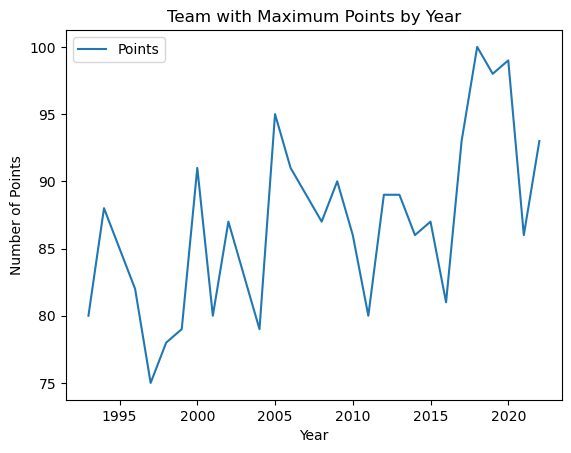

In [33]:
max_points_by_year.plot.line(x='Season_End_Year', y='Points', rot=0)
plt.xlabel('Season End Year')
plt.ylabel('Number of Points')
plt.title('Team with Maximum Points by Year')

plt.show()

**Analyzing team performance and favourite opponents**

In [73]:
win_loss_grid = data.groupby(['winner','loser'],as_index=False).count()
win_loss_grid = win_loss_grid[['winner','loser','Winning Team']]
win_loss_grid.rename(columns={"Winning Team":"wins"},inplace=True)
win_loss_grid=win_loss_grid.pivot(index='winner',columns='loser')
win_loss_grid=win_loss_grid.fillna(0)
win_loss_grid.head(10)

wins                                                 \
loser           Arsenal Aston Villa Barnsley Birmingham City Blackburn   
winner                                                                   
Arsenal             0.0        29.0      2.0             9.0      19.0   
Aston Villa        11.0         0.0      1.0             6.0      15.0   
Barnsley            0.0         1.0      0.0             0.0       0.0   
Birmingham City     1.0         4.0      0.0             0.0       5.0   
Blackburn           9.0        15.0      1.0             5.0       0.0   
Blackpool           0.0         0.0      0.0             0.0       0.0   
Bolton              5.0         6.0      0.0             6.0       8.0   
Bournemouth         1.0         3.0      0.0             0.0       0.0   
Bradford City       1.0         0.0      0.0             0.0       0.0   
Brentford           1.0         1.0      0.0             0.0       0.0   

                                                                      ...  \
loser           Blackpool Bolton Bournemouth Bradford City Brentford  ...   
winner                                                                ...   
Arsenal               2.0   15.0         7.0           2.0       1.0  ...   
Aston Villa           1.0   11.0         1.0           3.0       0.0  ...   
Barnsley              0.0    1.0         0.0           0.0       0.0  ...   
Birmingham City       2.0    6.0         0.0           0.0       0.0  ...   
Blackburn             1.0    9.0         0.0           0.0       0.0  ...   
Blackpool             0.0    1.0         0.0           0.0       0.0  ...   
Bolton                0.0    0.0         0.0           0.0       0.0  ...   
Bournemouth           0.0    0.0         0.0           0.0       0.0  ...   
Bradford City         0.0    0.0         0.0           0.0       0.0  ...   
Brentford             0.0    0.0         0.0           0.0       0.0  ...   

                                                                        \
loser           Sunderland Swansea City Swindon Town Tottenham Watford   
winner                                                                   
Arsenal               19.0          7.0          1.0      22.0    13.0   
Aston Villa           11.0          1.0          2.0      15.0     4.0   
Barnsley               0.0          0.0          0.0       0.0     0.0   
Birmingham City        6.0          0.0          0.0       3.0     0.0   
Blackburn              6.0          1.0          2.0      11.0     1.0   
Blackpool              1.0          0.0          0.0       1.0     0.0   
Bolton                 4.0          0.0          0.0       9.0     2.0   
Bournemouth            2.0          4.0          0.0       1.0     1.0   
Bradford City          1.0          0.0          0.0       0.0     1.0   
Brentford              0.0          0.0          0.0       0.0     2.0   

                                                                    
loser           West Brom West Ham Wigan Athletic Wimbledon Wolves  
winner                                                              
Arsenal              18.0     34.0           12.0       7.0   10.0  
Aston Villa           8.0     13.0            5.0       7.0    5.0  
Barnsley              0.0      0.0            0.0       1.0    0.0  
Birmingham City       3.0      3.0            4.0       0.0    2.0  
Blackburn             4.0      8.0            7.0       7.0    5.0  
Blackpool             1.0      0.0            1.0       0.0    1.0  
Bolton                2.0     12.0            4.0       2.0    5.0  
Bournemouth           3.0      4.0            0.0       0.0    0.0  
Bradford City         0.0      0.0            0.0       1.0    0.0  
Brentford             0.0      2.0            0.0       0.0    1.0  

[10 rows x 51 columns]

**Analyzing the Big 6 head to head**

In [91]:
teams = ['Manchester Utd','Arsenal','Tottenham','Chelsea','Liverpool','Manchester City']
#win_loss_grid.columns = win_loss_grid.columns.droplevel(0)

filtered_grid = win_loss_grid.loc[teams, teams]


filtered_grid

loser,Manchester Utd,Arsenal,Tottenham,Chelsea,Liverpool,Manchester City
winner,,,,,,
Manchester Utd,0.0,25.0,38.0,17.0,28.0,24.0
Arsenal,17.0,0.0,22.0,23.0,16.0,23.0
Tottenham,10.0,15.0,0.0,7.0,14.0,27.0
Chelsea,18.0,20.0,33.0,0.0,21.0,27.0
Liverpool,18.0,25.0,29.0,23.0,0.0,20.0
Manchester City,17.0,17.0,16.0,16.0,11.0,0.0


**Heatmap of the win loss grid** 

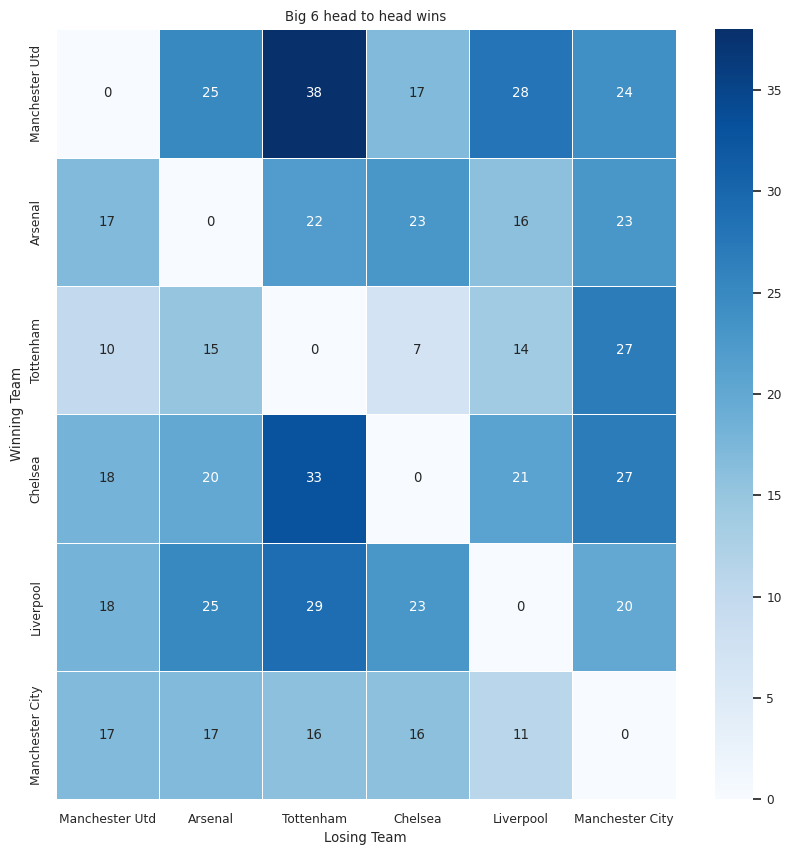

In [95]:
import seaborn as sns
sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(filtered_grid, annot=True, cmap='Blues', fmt='g', linewidths=0.5, ax=ax)

# Set the title and labels
ax.set_title('Big 6 head to head wins')
ax.set_xlabel('Losing Team')
ax.set_ylabel('Winning Team')

plt.show()